In [1]:
import plotly.express as px
import pandas as pd

In [2]:
data = pd.read_csv("./results/results.csv")

In [6]:
data_mean = pd.DataFrame(data.groupby(by=["emb_dim", "feat_name"])[["mae", "mse"]].mean()).reset_index()
data_std = pd.DataFrame(data.groupby(by=["emb_dim", "feat_name"])[["mae", "mse"]].std()).reset_index()
data_mean.columns = ["emb_dim", "feat_name", "mae_mean", "mse_mean"]
data_std.columns = ["emb_dim", "feat_name", "mae_std", "mse_std"]

In [18]:
data_mean["feat_name"].unique()

array(['basic_expansion', 'basic_expansion lsme',
       'basic_expansion lsme page_rank', 'closeness_centrality',
       'degree_centrality', 'eigenvector_centrality', 'lsme', 'page_rank'],
      dtype=object)

In [7]:
data_mean.head(3)

,emb_dim,feat_name,mae_mean,mse_mean
0,2,basic_expansion,0.178188,0.051222
1,2,basic_expansion lsme,0.076548,0.010342
2,2,basic_expansion lsme page_rank,0.073434,0.009554


In [8]:
data_std.head(3)

,emb_dim,feat_name,mae_std,mse_std
0,2,basic_expansion,0.008559,0.004761
1,2,basic_expansion lsme,0.007030,0.002037
2,2,basic_expansion lsme page_rank,0.005086,0.001384


In [10]:
df = data_mean.merge(data_std, on=["emb_dim", "feat_name"], how="inner")

In [25]:
feat_name_map = {}
feat_name_map["basic_expansion"] = "Basic Expansion"
feat_name_map["basic_expansion lsme"] = "Basic Expansion + LSME"
feat_name_map["basic_expansion lsme page_rank"] = "Basic Expansion + LSME + PageRank"
feat_name_map["closeness_centrality"] = "Closeness Centrality"
feat_name_map["degree_centrality"] = "Degree Centrality"
feat_name_map["eigenvector_centrality"] = "Eigenvector Centrality"
feat_name_map["lsme"] = "LSME"
feat_name_map["page_rank"] = "PageRank"

df["Feature Name"] = df["feat_name"].apply(lambda x : feat_name_map[x])
df.head(3)

,emb_dim,feat_name,mae_mean,mse_mean,mae_std,mse_std,feat_name_pretty,Feat Name,Feature Name
0,2,basic_expansion,0.178188,0.051222,0.008559,0.004761,Basic Expansion,Basic Expansion,Basic Expansion
1,2,basic_expansion lsme,0.076548,0.010342,0.007030,0.002037,Basic Expansion + LSME,Basic Expansion + LSME,Basic Expansion + LSME
2,2,basic_expansion lsme page_rank,0.073434,0.009554,0.005086,0.001384,Basic Expansion + LSME + PageRank,Basic Expansion + LSME + PageRank,Basic Expansion + LSME + PageRank


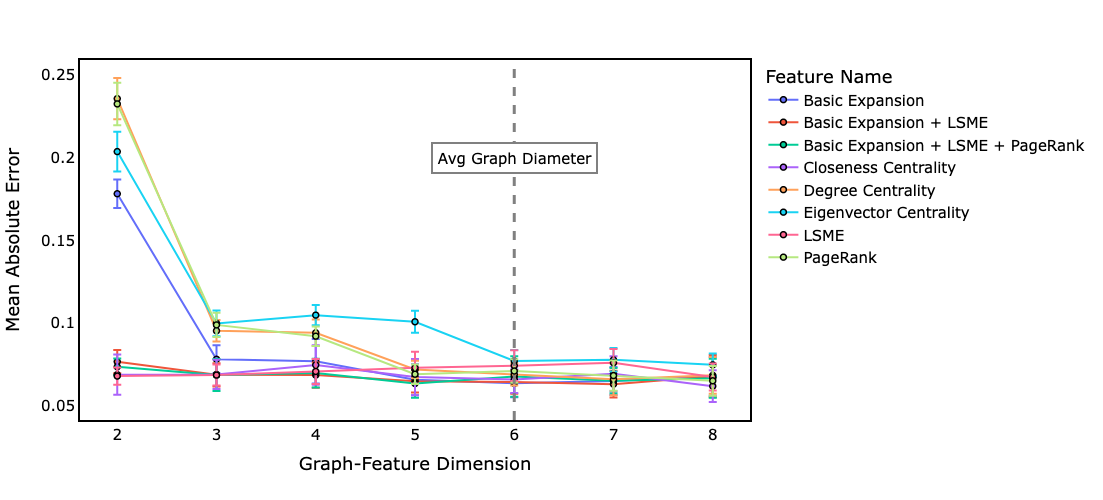

In [38]:
fig = px.line(df, x="emb_dim", y="mae_mean", error_y="mae_std", color="Feature Name", markers=True)

# Update figure layout
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Mean Absolute Error",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Graph-Feature Dimension",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=900,
    height=500,
    font=dict(
    size=15,
    color="black")
        
)
fig.update_layout(showlegend=True)
# fig.update_layout(legend=dict(
#     yanchor="bottom",
#     y=0.7,
#     xanchor="left",
#     x=0.61,
#     bordercolor="Black",
#     borderwidth=1
# ))



fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=1.0)

fig.add_vline(x=6, line_width=3, line_dash="dash", line_color="grey")

fig.add_annotation(x=6, y=0.2,
            text="Avg Graph Diameter",
            showarrow=False,
            arrowhead=1,
            bgcolor="white",
            font=dict(
            size=15,
            color="black"),
            bordercolor="grey",
            borderwidth=2,
            borderpad=4,)


fig.show()